# Brief overview of probability and random variables

This function adjusts `matplotlib` settings for a uniform feel in the textbook. Note that with `usetex=True,` fonts are rendered with LaTeX. This may result in an error if LaTeX is not installed on your system. In that case, you can set `usetex` to `False.`

In [1]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

## Probability axioms

Given an event $A$, such as the outcome of a coin toss, we assign it a real number $p(A)$, called the probability of $A$. Note that $p(A)$ could also correspond to a probability that a value of $x$ falls in a $dx$ wide interval around $x$. To qualify as a probability, $p(A)$ must satisfy three Kolmogorov axioms:

1. $p(A) \geq 0$ for each $A$.
2. $p(\Omega) = 1$, where $\Omega$ is the set of all possible outcomes.
3. If $A_1$, $A_2$, . . . are disjoint events, then $p (\bigcup^{\infty}_{i=1}A_i) = \sum_{i=1}^{\infty}p(A_i)$ where $\bigcup$ stands for “union.”

Several useful rules can be derived as a consequence of these axioms.

**Sum rule**:  The probability that the union of two events, $A$ and $B$, will happen is given by,

$$\qquad\qquad p(A \cup B) = p(A) + p(B) - p(A \cap B)\qquad\qquad\qquad(1)$$


which is the sum of $A$ and $B$'s respective probabilities minus the probability that both $A$ and $B$ will happen. The union of two events is the probability that *either* event occurs. The $\cap$ in the equation stands for "intersection", and subtracting the last term, $p(A \cap B)$, avoids double counting the places that $A$ and $B$ overlap. In the figure below, we show this in a diagram.

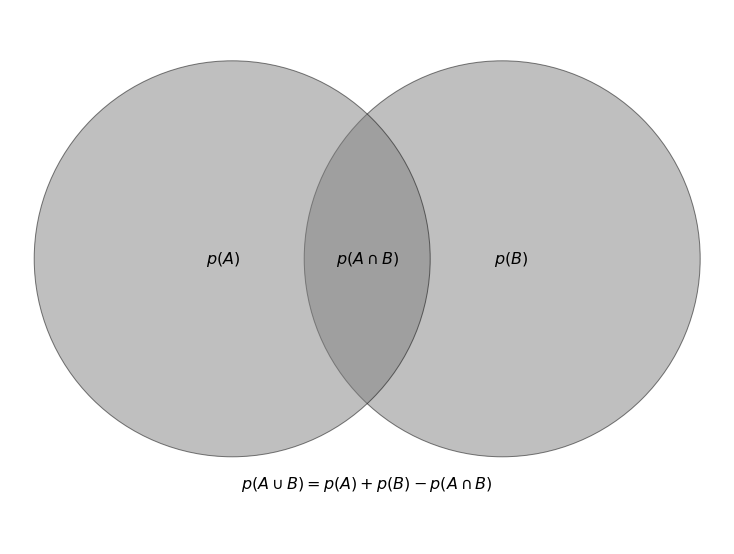

In [2]:
from matplotlib import pyplot as plt

# create plot
fig = plt.figure(figsize=(10, 7.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

# draw intersecting circles
ax.add_patch(plt.Circle((1.5, 0.2), 2.2, fc='gray', ec='black', alpha=0.5))
ax.add_patch(plt.Circle((-1.5, 0.2), 2.2, fc='gray', ec='black', alpha=0.5))

# add text
text_kwargs = dict(ha='center', va='center', fontsize=16)
ax.text(-1.6, 0.2, "$p(A)$", **text_kwargs)
ax.text(1.6, 0.2, "$p(B)$", **text_kwargs)
ax.text(0.0, 0.2, "$p(A \cap B)$", **text_kwargs)
ax.text(0, -2.3, "$p(A \cup B) = p(A) + p(B) - p(A \cap B)$", **text_kwargs)

ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)

plt.show()

**Rule of complementary events**: The probability of an event happening plus the probability of it not happening is equal to 1.
$$p(A) + p(\overline{A}) = 1$$

**Rule of multiplication**: The probability that both events $A$ and $B$ occur is equal to the probability that event $B$ occurs times the probability that event $A$ occurs given that $B$ has occurred. Switching $A$ and $B$ yields an equivalent statement.

$$ p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$

In the equation above, "|" is pronounced "given," and $p(A|B)$ is the probability of event $A$ occurring given that B has occurred.

**Example**: Find the probability of rolling an odd number greater than 2.

> Event A: Rolling an odd number
>
> Event B: Rolling a number greater than 2
>
>$P(\text{odd and greater than 2}) = P(\text{odd|if} >2) \times P(> 2)$
>    
>- All outcomes: 1 2 3 4 5 6
>- $P(\text{is}$ > 2) = count(3 4 5 6) / count (1 2 3 4 5 6) = 4/6
>- the probability that a number is odd if it's greater than two:  3,5
>- $P(\text{is odd| if} > 2)$ = count(3 5) / count (3 4 5 6) = 1/2
>   
> $P(\text{odd and greater than 2})$ = 4/6 $\times$ 1/2 = $\fbox{1/3}$
>   
>We can get the same answer by determining the odd numbers greater than two on a die (2) and dividing by the total possibilities (6) to get 1/3.
    
    

**The law of total probability**: if events $B_i, i=1,..., N$ are disjoint and their union is the set of all possible outcomes, then

$$p(A) = \sum_i p(A \cap B_i) = \sum_i p(A|B_i)p(B_i).$$

Conditional probabilities also satisfy the law of total probability. Assuming that an event $C$ is not mutually exclusive with $A$ or any of $B_i$,

$$    p(A|C) = \sum\limits_{i}p(A|C \cap B_i)p(B_i|C)  $$

**Example**: Assume we have a box with three bags of marbles: one bag has 3 green and 7 blue marbles, another bag has 6 green and 4 blue marbles, and the last bag has 2 green and 8 blue marbles. We want to find the total probability of grabbing a green marble from any of the three bags.

> $P(G)$ = probability of choosing a green marble:
>
> $P(G|B_i)$ = probability of choosing a green marble from bag B$_i$:
>
> - Bag 1: $P(G|B_1)$ = 3/10
> - Bag 2: $P(G|B_2)$ = 6/10
> - Bag 3: $P(G|B_3)$ = 2/10
>
> Using $P(G) = \sum_i P(G|B_i)*P(B_i)$ where $B_1 = B_2 = B_3 = \frac{1}{3}$
> 
> $P(G) = \big(\frac{3}{10} \times \frac{1}{3}\big) + \big(\frac{6}{10} \times \frac{1}{3}\big) + \big(\frac{2}{10} \times \frac{1}{3}\big) = \frac{11}{30} = 0.37$
>
> Thus, if we randomly select one of the bags and then randomly select one marble from that bag, the probability we choose a green marble is 0.37.



### Classical inference vs. Bayesian inference

Classical inference and Bayesian inference differ fundamentally in the interpretation of the resulting probabilities, which will be discussed in detail in chapters 4 and 5. Briefly, classical statistical inference is concerned with $p(A)$, interpreted as the long-term outcome or frequency with which $A$ occurs (or would occur) in identical repeats of an experiment; events are restricted to propositions about random variables (see below). Bayesian inference is concerned with $p(A|B)$, interpreted as the plausibility of a proposition $A$, conditional on the truth of $B$, and $A$ and $B$ can be any logical proposition (i.e., they are not restricted to propositions about random variables).


## Random variables

A random, or stochastic, variable is, roughly speaking, a variable whose value results from the measurement of a quantity subject to random variations. Unlike normal mathematical variables, a random variable can take on a set of possible different values, each with an associated probability.

There are two main types of random variables: discrete and continuous.
* The outcomes of **discrete** random variables form a **countable set.** 
* The outcomes of **continuous** random variables **usually map onto the real number set** (though one can define mapping to the complex plane or use matrices instead of real numbers, etc.). 

The function which ascribes a probability value to each outcome of the random variable is the **probability density function (pdf).** *Note that other sources may use **"probability mass function"** for discrete variables.*

**Independent identically distributed (iid)** random variables are drawn from the same distribution and are independent. Two random variables, $x$ and $y$ are independent if and only if

$$p(x,y) = p(x)p(y)$$

for all values of $x$ and $y$. Recall that $p(x,y) = p(x)p(y|x)$ is true of any variables, but for independent variables, $p(y|x) = p(y)$ since the knowledge of the value of $x$ tells us **nothing** about the value of $y$.


 


**Example**: Find the probability of rolling a 1 and then rolling a 3.
    
> p(second is 3, first is 1) = p(second is 3 | first is 1) $\times$ p(first is 1)
>
>= p(second is 3) $\times$  p(first is 1)
>
>= 1/6 $\times$  1/6 = 1/36
>
> Because the two events are independent since the first roll tells us nothing about the second roll, the term $\text{p(second is 3}| \text{first is 1})$ simplified to $\text{p(second is 3})$.


**Example:** Suppose we have a deck of cards (52 cards) with 13 of each suit (spades, clubs, diamonds, and hearts). What's the probability of drawing two diamonds in a row?

> These are dependent events, so we will use $p(x,y) = p(x|y)p(y)$
>
> $p(y)$: Drawing a diamond on the first draw = 13/52 
> - there is an equally likely chance of drawing any of the 4 suits in a full deck of cards
>
> $p(x|y)$: Drawing a diamond on the second draw = 12/51
> - given that we don't replace the card we just drew, we now have a deck of 51 cards.
> - since we are assuming we've drawn a diamond on the first draw (x "given" y), we now have 12 diamonds in the deck.
>
> $p(x,y) = \frac{13}{52} \times \frac{12}{51} = \frac{1}{17}$
>
> **However, assume we put the card we drew back**
>
> $p(y)$ stays the same, but $p(x|y)$ becomes $p(x)$ since the first draw now tells us nothing about the second draw; these have become independent events. Drawing a diamond on the second draw now has the same probability as our first draw.
>
> $p(x,y) = \frac{13}{52} \times \frac{13}{52} = \frac{1}{16}$

 


## Conditional probability and Bayes’ rule

When two continuous random variables are not independent, it follows from eq. 1

$$\qquad\qquad p(x,y) = p(x|y)p(y) = p(y|x)p(x).\qquad\qquad\qquad\quad\,(2)$$
    
The *marginal probability function* is defined as

$$\qquad\qquad\qquad p(x) = \int p(x,y)\:dy \qquad\qquad\qquad\qquad\qquad\, (3) $$

and analogously for $p(y)$. Note that complete knowledge of the conditional pdf $p(y|x)$, and the marginal probability $p(x)$, is sufficient to fully reconstruct $p(x,y)$ (the same is true with $x$ and $y$ reversed).

Combining eq. 2 and 3, we get a continuous version of the law of total probability,

$$\qquad\qquad\qquad p(x) = \int p(x|y)\: p(y)\: dy \qquad\qquad\qquad\qquad\: (4)$$

In the figure below, we will show an example of a two-dimensional probability distribution together with corresponding marginal and conditional probability distributions. Note that $x$ and $y$ are **not** independent in this case. 

- The marginal probabilities will be the left and bottom panels of the graph on the left. From equation 3 above, we see that the marginal probabilities will be the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).


- The three panels on the right will show the conditional probability (of x) for three y values: $y = 0.5, 1,$ and $1.5$ Note that the conditional probability distributions $p(x|y = y_0)$ are simply one-dimensional “slices” through the two-dimensional image $p(x,y)$ at given values of $y_0$, and then divided (renormalized) by the value of the marginal distribution $p(y)$ at $y = y_0$. As a result of this renormalization, the integral of $p(x|y)$ (over $x$) is unity.

First we will define a random 2D distribution, generate the data, and compute the normalized 2D histogram.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter

def banana_distribution(N=10000):
    """This generates random points in a banana shape"""
    # create a truncated normal distribution
    theta = np.random.normal(0, np.pi / 8, 10000)
    theta[theta >= np.pi / 4] /= 2
    theta[theta <= -np.pi / 4] /= 2
    # define the curve parametrically
    r = np.sqrt(1. / abs(np.cos(theta) ** 2 - np.sin(theta) ** 2))
    r += np.random.normal(0, 0.08, size=10000)
    x = r * np.cos(theta + np.pi / 4)
    y = r * np.sin(theta + np.pi / 4)
    return (x, y)

# Generate the data and compute the normalized 2D histogram
np.random.seed(0)
x, y = banana_distribution(10000)

Ngrid = 41
grid = np.linspace(0, 2, Ngrid + 1)

H, xbins, ybins = np.histogram2d(x, y, grid)
H /= np.sum(H)

Next, we'll plot the results.

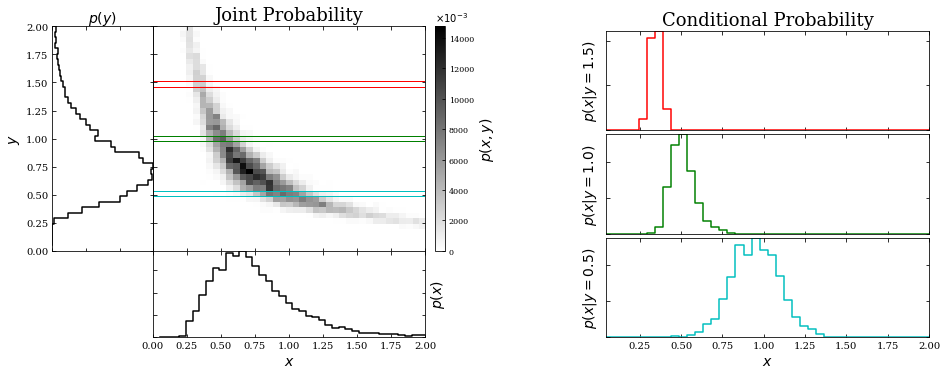

In [8]:
# plot the result
fig = plt.figure(figsize=(14, 6))

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
ax_Px_y = [plt.axes((0.65, 0.62, 0.32, 0.23)),
           plt.axes((0.65, 0.38, 0.32, 0.23)),
           plt.axes((0.65, 0.14, 0.32, 0.23))]

# set axis label formatters
ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())

ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())

# draw the joint probability
plt.axes(ax_Pxy)
H *= 1000
plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',
           extent=[0, 2, 0, 2], cmap=plt.cm.binary)

cb = plt.colorbar(cax=ax_cb)
cb.set_label('$p(x, y)$', fontsize = 14)
plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes)

# draw p(x) distribution
ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

# define axis limits
ax_Pxy.set_xlim(0, 2)
ax_Pxy.set_ylim(0, 2)
ax_Px.set_xlim(0, 2)
ax_Py.set_ylim(0, 2)

# label axes
ax_Pxy.set_xlabel('$x$', fontsize = 14)
ax_Pxy.set_ylabel('$y$', fontsize = 14)
ax_Px.set_xlabel('$x$', fontsize = 14)
ax_Px.set_ylabel('$p(x)$', fontsize = 14)
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$y$', fontsize = 14)
ax_Py.set_xlabel('$p(y)$', fontsize = 14)
ax_Py.xaxis.set_label_position('top')

ax_Px.tick_params(axis='both', which='major', labelsize=10)
ax_Py.tick_params(axis='both', which='major', labelsize=10)

# draw marginal probabilities
iy = [3 * Ngrid // 4, Ngrid // 2, Ngrid // 4]
colors = 'rgc'
axis = ax_Pxy.axis()
for i in range(3):
    # overplot range on joint probability
    ax_Pxy.plot([0, 2, 2, 0],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
    Px_y = H[iy[i]] / H[iy[i]].sum()
    ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
    ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
    ax_Px_y[i].set_ylabel('$p(x | y = %.1f)$' % ybins[iy[i]], fontsize = 14)
    ax_Px_y[i].tick_params(axis='both', which='major', labelsize=10)
ax_Pxy.axis(axis)

ax_Px_y[2].set_xlabel('$x$', fontsize = 14)

ax_Pxy.set_title('Joint Probability', fontsize = 18)
ax_Px_y[0].set_title('Conditional Probability', fontsize = 18)

plt.show()

Eq's. 2 and 4 can be combined to yield *Bayes' rule*:


$$ \qquad\qquad p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y)dy} \qquad\qquad\qquad(5) $$

Bayes’ rule relates conditional and marginal probabilities to each other. In the case of a discrete random variable, $y_j$, with $M$ possible values, the integral in eq. 5 becomes a sum:

$$p(y_j|x) = \frac{p(x|y_j)p(y_j)}{p(x)} = \frac{p(x|y_j)p(y_j)}{\sum_{j=1}^M p(x|y_j)p(y_j)} $$

## Example: Monty Hall problem

The following problem illustrates how different probabilistic inferences can be derived about the same physical system depending on the available prior information.

There are $N=1000$ boxes, of which 999 are empty, and one contains some “prize.” You choose a box at random; the probability that it contains the prize is 1/1000. This box remains closed while another person who knows which box contains the prize opens 998 **empty boxes** chosen from the 999 remaining boxes. 

At this point, two boxes remain: the one you chose at random and the last unopened box. This remaining box is almost certain to contain the prize; the probability is 999/1000 because there is a chance of only 1 in 1000 that the prize is in the box you chose initially, and the probabilities for the two unopened boxes must add up to 1. If you were offered to switch the box you initially chose with another unopened box, you would increase the chances of getting the prize by a factor of 999 (from 1/1000 to 999/1000). 

On the other hand, if a third person walked in and had to choose one of the two remaining unopened boxes, but without knowing that initially there were 1000 boxes, nor which one you initially chose, **they would pick the box with the prize with a probability of 1/2**. The difference in expected outcomes is due to different prior information, and it nicely illustrates that the probabilities we assign to events reflect the state of our knowledge.

#### Formal derivation of the solution using Bayes’ rule


* $H_i$ is the hypothesis that the prize is in the $i$th box
* $p(H_i|I) = 1/N$ is its prior probability given background information $I$. 
* The "data" that $N − 2$ boxes, all but the first box and the $k$th box $(k > 1)$, are empty is $d_k$

Without a loss of generality, the box chosen initially can be enumerated as the first box. The probability that the prize is in the first box, given $I$ and $k$, can be evaluated using Bayes’ rule (see eq. 3.11)

$$p(H_1|d_k,I) = \frac{p(d_k|H_1,I)p(H_1|I)}{p(d_k|I)} $$

The probability that the $k$th box remains unopened given that $H_1$ is true, $p(d_k|H_1,I)$ is $1/(N−1)$ because this box is randomly chosen from $N − 1$ boxes. The denominator can be expanded using
the law of total probability,

$$ p(d_k|I) = \sum\limits_{i=1}^N p(d_k|H_i, I)p(H_i|I) $$

The probability that the $k$th box stays unopened, given that $H_i$ is true, is

$$ p(d_k| H_i, I) =  \begin{cases} 1 \text{ for } k = i\\0 \text{ otherwise} \end{cases} $$

except when $i = 1$. This reduces the sum to only two terms:

$$ p(d_k|I) = p(d_k|H_1,I)p(H_1|I)+ p(d_k|H_k,I)p(H_k|I) = \frac{1}{(N-1)N}+\frac{1}{N}=\frac{1}{N-1} $$

This result might appear to agree with our intuition because there are $N − 1$ ways to choose one box out of $N − 1$ boxes, but this interpretation is not correct: the $k$th box is not chosen randomly in the case when the prize is not in the first box, but instead, it must be chosen (the second term in the sum above). Hence, from eq. 3.12, the probability that the prize is in the first (initially chosen) box is

$$p(H_1|d_k,I) = \frac{\frac{1}{(N-1)}\frac{1}{N}}{\frac{1}{(N-1)}} = \frac{1}{N}$$

It is easy to show that $p(H_k|d_k,I) = (N −1)/N$. Note that $p(H_1|d_k,I)$ is equal to the prior probability $p(H_1|I)$; that is, the opening of $N − 2$ empty boxes (data $d_k$) did not improve our knowledge of the content of the first box (but it did improve our knowledge of the content of the $k$th box by a factor of $N −1$).

## Example: 2×2 contingency table

Assume we have a test for a disease. One variable is the result of the test T: the test can be negative (0) or positive (1); the second variable is the presence of disease D: the patient can have a disease (1) or not (0). 

There are four possible combinations in this sample space: 
$$T =0;D=0 \quad\text{True negative}$$
$$T =0;D=1 \quad\text{False negative}$$
$$T =1;D=0 \quad\text{False positive}$$
$$T =1;D=1 \quad\text{True positive}$$

We also know that the probabilities for false positive and false negative are 
$$p(T =1|D=0) = \epsilon_{fP}$$
$$p(T =0|D=1) = \epsilon_{fN}$$

where $\epsilon_{fP}$ and $\epsilon_{fN}$ are typically small. Then the probabilities for true positive and true negative are
$$p(T =0|D=0) = 1-\epsilon_{fP}$$
$$p(T =1|D=1) = 1-\epsilon_{fN}$$

We'll visualize the information so far in a contingency table below.

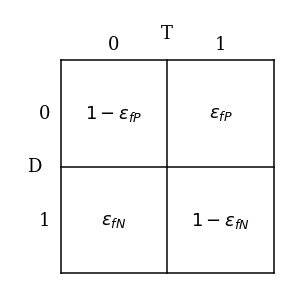

In [5]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(4, 4), facecolor='w')
ax = fig.add_axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

for i in [-1, 0, 1]:
    ax.plot([i, i], [-1, 1], '-k')
    ax.plot([-1, 1], [i, i], '-k')

kwds = dict(ha='center', va='center', size=18)

ax.text(-0.5, 1.15, '0', **kwds)
ax.text(0.5, 1.15, '1', **kwds)
ax.text(0, 1.25, 'T', **kwds)

ax.text(-1.15, 0.5, '0', **kwds)
ax.text(-1.15, -0.5, '1', **kwds)
ax.text(-1.25, 0, 'D', **kwds)

kwds['size'] = 18

ax.text(0.5, 0.5, '$\epsilon_{fP}$', **kwds)
ax.text(-0.5, 0.5, '$1 - \epsilon_{fP}$', **kwds)
ax.text(-0.5, -0.5, '$\epsilon_{fN}$', **kwds)
ax.text(0.5, -0.5, '$1 - \epsilon_{fN}$', **kwds)

ax.set_xlim(-1.5, 1.2)
ax.set_ylim(-1.2, 1.5)

plt.show()

Let us assume that we also know that the prior probability (in the absence of any testing based on some large population studies unrelated to our test) for the disease in question is $p(D = 1) = \epsilon_D$, where $\epsilon_D$ is a small number. This makes $p(D = 0) = 1-\epsilon_D$.

Our patient takes a test and it comes out positive $(T=1)$ What is the probability that our patient has contracted the disease, $p(D = 1|T = 1)$? Using Bayes’ rule (eq. 5), we have

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1)}. $$

Given our assumptions,

$$ p(D=1|T=1) = \frac{(1-\epsilon_{fN})\epsilon_{D}}{\epsilon_{fP}(1-\epsilon_D)+(1-\epsilon_{fN})\epsilon_{D}}, $$

which simplifies to

$$ p(D =1|T=1) = \frac{\epsilon_D-\epsilon_{fN}\epsilon_D}{\epsilon_D+\epsilon_{fP}- [\epsilon_D(\epsilon_{fP}+\epsilon_{fN})]} \approx \frac{\epsilon_D}{\epsilon_D + \epsilon_{fP}}.$$



This is an interesting result: we can only reliably diagnose a disease (i.e., p(D = 1|T = 1) $\sim$ 1) if $\epsilon_{fP} \ll \epsilon_D$. For rare diseases, the test must have an exceedingly low false-positive rate! On the other hand, if $\epsilon_{fP} \gg \epsilon_D$, then $p(D = 1|T = 1) \sim \epsilon_D/\epsilon_{fP} \ll 1$ and the testing does not produce conclusive evidence. The false-negative rate is not quantitatively important as long as it is not much larger than the other two parameters.

Consider a sample of 1000 tested people. Assume we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{fp} = 0.02$).

$$ p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.33 $$
 

Then in a sample of, e.g., 1000 people, 10 people test positive and actually have the disease (1000 $\times$  0.01), but another 20 will test positive while healthy (1000 $\times$  0.02). Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease (not 98%).

## Transformations of random variables

Any function of a random variable is itself a random variable. It is a common case in practice that we measure the value of some variable $x$, but the interesting final result is a function $y(x)$. If we know the probability density distribution $p(x)$, where $x$ is a random variable, what is the distribution $p(y)$, where $y = \Phi(x)$ (with $x = \Phi−1(y)$)? It is easy to show that

$$ p(y) = p\big[\Phi ^ {-1} (y)\big] \bigg|\frac{d\Phi^{-1}(y)}{dy}\bigg|.$$

For example, if $y=\Phi(x)= \text{exp}(x)$, then $x=\Phi^{−1}(y)=\text{ln}(y)$. If $p(x)=1 $ for $0\leq x \leq 1 $ and 0 otherwise (a uniform distribution), the equation above leads to $p(y) = 1/y$, with $1 \leq y \leq e$. That is, a uniform distribution of $x$ is transformed into a nonuniform distribution of $y$.

Below is an example of transforming a uniform distribution. In the left panel, $x$ is sampled from a uniform distribution of unit width centered on $x = 0.5$ ($\mu = 0$ and $W = 1$; see §3.3.1). In the right panel, the distribution is transformed via $y$ = exp($x$). The form of the resulting pdf is computed from the equation above.

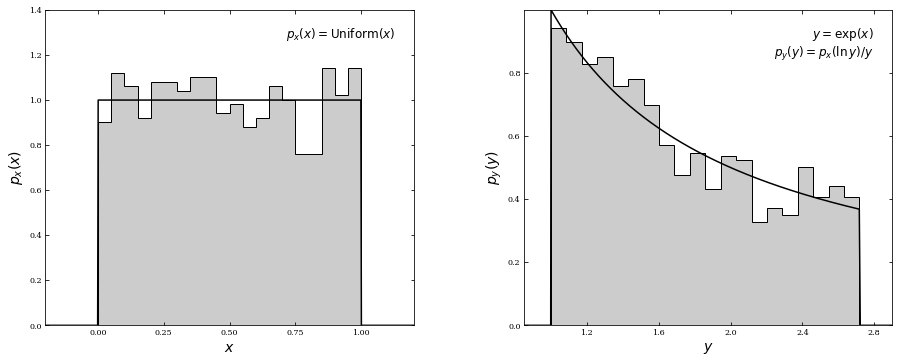

In [18]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Set up the data
np.random.seed(0)

# create a uniform distribution
uniform_dist = stats.uniform(0, 1)
x_sample = uniform_dist.rvs(1000)
x = np.linspace(-0.5, 1.5, 1000)
Px = uniform_dist.pdf(x)

# transform the data
y_sample = np.exp(x_sample)
y = np.exp(x)
Py = Px / y

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.3, bottom=0.17, top=0.9)

ax = fig.add_subplot(121)
ax.hist(x_sample, 20, histtype='stepfilled', fc='#CCCCCC', density=True)
ax.plot(x, Px, '-k')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 1.4001)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, r'$p_x(x) = {\rm Uniform}(x)$',
        va='top', ha='right',
        transform=ax.transAxes, fontsize = 12)
ax.set_xlabel('$x$', fontsize = 14)
ax.set_ylabel('$p_x(x)$', fontsize = 14)


ax = fig.add_subplot(122)
ax.hist(y_sample, 20, histtype='stepfilled', fc='#CCCCCC', density=True)
ax.plot(y, Py, '-k')
ax.set_xlim(0.85, 2.9)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, '$y=\exp(x)$\n$p_y(y)=p_x(\ln y) / y$',
        va='top', ha='right',
        transform=ax.transAxes, fontsize = 12)
ax.set_xlabel('$y$',fontsize = 14)
ax.set_ylabel('$p_y(y)$', fontsize = 14)

plt.show()

If some value of $x$, say $x_0$, is determined with an uncertainty $\sigma_x$, then we can use a Taylor series expansion to estimate the uncertainty in $y$, say $\sigma_y$, at $y_0 = \Phi(x_0)$ as

$$\sigma_y = \bigg|\frac{d\Phi(x)}{dx}\bigg|_0 \sigma_x $$.


where the derivative is evaluated at $x_0$. While often used, this approach can produce misleading results when it is insufficient to keep only the first term in the Taylor series. For example, if the flux measurements follow a Gaussian distribution with a relative accuracy of a few percent, then the corresponding distribution of astronomical magnitudes (the logarithm of flux; see appendix C) is close to a Gaussian distribution. However, if the relative flux accuracy is 20% (corresponding to the so-called “$5 − \sigma$” detection limit), then the distribution of magnitudes is skewed and non-Gaussian. Furthermore, the mean magnitude is not equal to the logarithm of the mean flux (but the medians still correspond to each other!).

Below is an example of relatively high Gaussian flux errors becoming non-Gaussian magnitude errors; additionally, we'll show relatively low Gaussian flux errors becoming mostly Gaussian magnitude errors. The dotted line shows the location of the mean flux $-$ note that this is not coincident with the peak of the magnitude distribution for high Gaussian flux errors. However, for low Gaussian flux errors, the dotted line roughly passes through the peak of the magnitude distribution.

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(1)

# create distribution with 1% flux errors
dist = norm(1, 0.01)
flux = dist.rvs(10000)
flux_fit = np.linspace(0.001, 2, 1000)
pdf_flux_fit = dist.pdf(flux_fit)

# transform this distribution into magnitude space
mag = -2.5 * np.log10(flux)
mag_fit = -2.5 * np.log10(flux_fit)
pdf_mag_fit = pdf_flux_fit.copy()
pdf_mag_fit[1:] /= abs(mag_fit[1:] - mag_fit[:-1])
pdf_mag_fit /= np.dot(pdf_mag_fit[1:], abs(mag_fit[1:] - mag_fit[:-1]))

# create distribution with 25% flux errors
dist25 = norm(1, 0.20)
flux25 = dist25.rvs(10000)
flux_fit25 = np.linspace(0.001, 2, 1000)
pdf_flux_fit25 = dist25.pdf(flux_fit25)

# transform this distribution into magnitude space
mag25 = -2.5 * np.log10(flux25)
mag_fit25 = -2.5 * np.log10(flux_fit25)
pdf_mag_fit25 = pdf_flux_fit25.copy()
pdf_mag_fit25[1:] /= abs(mag_fit25[1:] - mag_fit25[:-1])
pdf_mag_fit25 /= np.dot(pdf_mag_fit25[1:], abs(mag_fit25[1:] - mag_fit25[:-1]))

Next, we'll plot the distributions.

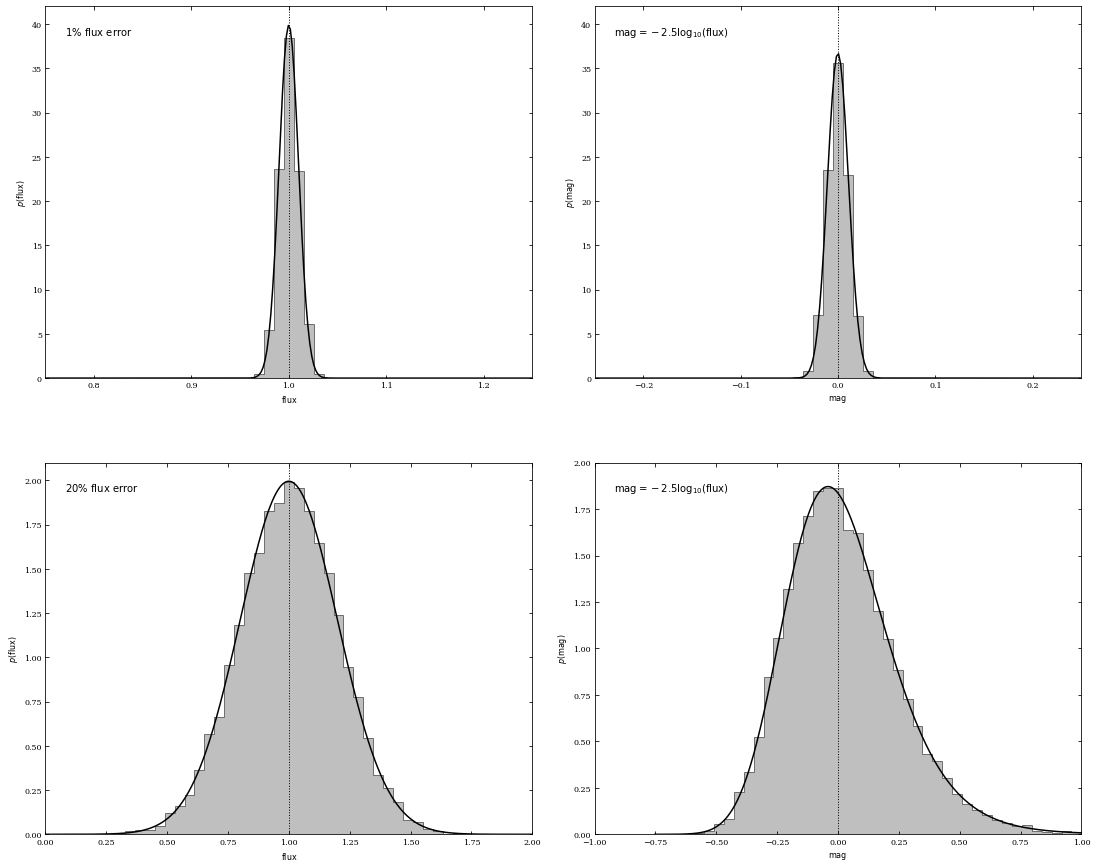

In [20]:
fig, ax = plt.subplots(2,2)                
fig.set_size_inches(15,12)   
fig.tight_layout(w_pad=4, h_pad=7)

#------------------------------------------------------------ 1% flux error
ax[0,0].hist(flux, bins=np.linspace(0.75, 1.25, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, density=True)
ax[0,0].plot(flux_fit, pdf_flux_fit, '-k')
ax[0,0].plot([1, 1], [0, 42], ':k', lw=1)
ax[0,0].set_xlim(0.75, 1.25)
ax[0,0].set_xlabel(r'${\rm flux}$')
ax[0,0].set_ylabel(r'$p({\rm flux})$')
ax[0,0].text(0.04, 0.95, r'${\rm 1\%\ flux\ error}$',
        ha='left', va='top', transform=ax[0,0].transAxes)

#------------------------------------------------------------ 1% magnitude error
ax[0,1].hist(mag, bins=np.linspace(-0.25, 0.25, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, density=True)
ax[0,1].plot(mag_fit, pdf_mag_fit, '-k')
ax[0,1].plot([0, 0], [0, 42], ':k', lw=1)
ax[0,1].set_xlim(-0.25, 0.25)
ax[0,1].set_xlabel(r'${\rm mag}$')
ax[0,1].set_ylabel(r'$p({\rm mag})$')
ax[0,1].text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$',
        ha='left', va='top', transform=ax[0,1].transAxes)

#------------------------------------------------------------ 20% flux error
ax[1,0].hist(flux25, bins=np.linspace(0, 2, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, density=True)
ax[1,0].plot(flux_fit25, pdf_flux_fit25, '-k')
ax[1,0].plot([1, 1], [0, 2.1], ':k', lw=1)
ax[1,0].set_xlim(0, 2)
ax[1,0].set_ylim(0, 2.1)
ax[1,0].set_xlabel(r'${\rm flux}$')
ax[1,0].set_ylabel(r'$p({\rm flux})$')
ax[1,0].text(0.04, 0.95, r'${\rm 20\%\ flux\ error}$',
        ha='left', va='top', transform=ax[1,0].transAxes)

#------------------------------------------------------------ 20% magnitude error
ax[1,1].hist(mag25, bins=np.linspace(-1, 1, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, density=True)
ax[1,1].plot(mag_fit25, pdf_mag_fit25, '-k')
ax[1,1].plot([0, 0], [0, 2], ':k', lw=1)
ax[1,1].set_xlim(-1, 1)
ax[1,1].set_xlabel(r'${\rm mag}$')
ax[1,1].set_ylabel(r'$p({\rm mag})$')
ax[1,1].text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$',
        ha='left', va='top', transform=ax[1,1].transAxes);